# Linear Regression from Scratch

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
class LinearRegression(object):
    def __init__(self, alpha=0.01, weights=None):
        self.alpha = alpha
        self.weights = weights
        self.m = None
        self.x = None
        self.y = None
        self.x_p = None
        self.cost = None
        
    def cost_function(self):
        self.m = len(y)
        error = np.square(np.dot(self.x, self.weights) - self.y)
        self.cost = np.sum(error) / (2 * self.m)
        return self.cost
        
    def optmize_weights(self):
        self.weights = np.random.random((self.x.shape[1], 1))
        self.weights = np.dot(np.linalg.inv(np.dot(self.x.T, self.x)), np.dot(self.x.T, self.y))
        return self.weights
    
    def fit(self, x, y):
        self.x = x
        self.y = y.reshape((-1, 1))
        return print(f'Optimized Weights : {self.optmize_weights().ravel()}\nOptimized Cost : {self.cost_function()}')
    
    def predict(self, x):
        self.x_p = x
        return np.dot(self.x_p, self.weights)
    
    def visualize(self, x, y):
        xs = x[:, 1]
        plt.scatter(xs, y, c='r', s=100, label='Actual Data', alpha=0.5)
        plt.plot(xs, np.dot(x, self.weights), color='b', alpha=0.5, label='Predictions', linewidth=2)
        plt.legend()
        plt.xlabel('Years of Experience')
        plt.ylabel('Salary in $10, 000')
        plt.show()

In [144]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [145]:
x = data.iloc[:, [0]].values
y = data.iloc[:, -1].values
x = np.insert(x, 0, 1, axis=1)

In [146]:
reg = LinearRegression()

In [147]:
reg.fit(x, y)

Optimized Weights : [25792.20019867  9449.96232146]
Optimized Cost : 15635475.861140484


In [148]:
y # Actual Y Values

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [149]:
reg.predict(x).ravel() # Predictions

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

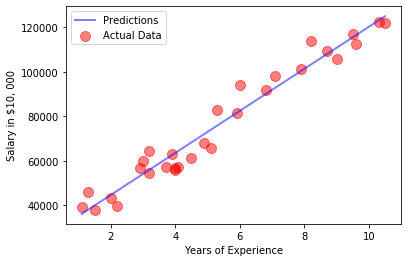

In [150]:
reg.visualize(x, y)